In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline 

In [2]:
os.listdir()

['healthDataNew4.csv',
 '.DS_Store',
 'structured_data_classifier',
 'Categorical Summary.docx',
 'Project Draft 1.ipynb',
 'Data Sets',
 'Modeling 2.ipynb',
 'healthcareClanedTrain3.csv',
 'healthcareClanedTrain2.csv',
 'Modeling .ipynb',
 'Decision and Naives - healthcareClanedTrain3.ipynb',
 '.ipynb_checkpoints',
 'MIS 776 Group Project.pdf',
 '11.16.2020 Dannica Update.ipynb',
 'Clustering with classification.ipynb',
 'healthcareClanedTrain.csv',
 'Ryan Script.ipynb']

In [3]:
## Load the cleaned dataset 
health = pd.read_csv('healthcareClanedTrain3.csv')
health.head()

,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,8,0,3,0,3,0,0,0,2,31397,0,0,2,5,4911,0
1,2,0,5,0,2,0,1,0,2,31397,1,0,2,5,5954,4
2,10,1,1,1,2,1,1,1,2,31397,1,0,2,5,4745,3
3,26,2,2,2,2,0,0,2,2,31397,1,0,2,5,7272,4
4,26,2,2,2,2,0,1,2,2,31397,1,0,2,5,5558,4


In [4]:
### Check the unique values in each column

for i in health.columns:
    print("Variable {} has {} unique values.".format(i,health[i].nunique()), '\n')

Variable hosp_code has 32 unique values. 

Variable hosp_type has 7 unique values. 

Variable city_code has 11 unique values. 

Variable hosp_region has 3 unique values. 

Variable rooms_available has 18 unique values. 

Variable department has 5 unique values. 

Variable ward_type has 6 unique values. 

Variable ward_code has 6 unique values. 

Variable bed_grade has 4 unique values. 

Variable patient_id has 92009 unique values. 

Variable admission_type has 3 unique values. 

Variable severity has 3 unique values. 

Variable num_visitors has 28 unique values. 

Variable age has 10 unique values. 

Variable deposit has 7300 unique values. 

Variable stay has 11 unique values. 



In [5]:
health1 = pd.read_csv('Data Sets/healthcare/train_data.csv')
health1.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


### Change coumns names of health1

In [6]:
health1.columns = ['case_id', 'hosp_code','hosp_type','city_code','hosp_region','rooms_available','department',
                  'ward_type','ward_code','bed_grade','patient_id','city_patientCode','admission_type',
                  'severity','num_visitors','age','deposit','stay']

health1.head()

,case_id,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,city_patientCode,admission_type,severity,num_visitors,age,deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


### Check for null values

In [7]:
health1.isna().sum()

case_id                0
hosp_code              0
hosp_type              0
city_code              0
hosp_region            0
rooms_available        0
department             0
ward_type              0
ward_code              0
bed_grade            113
patient_id             0
city_patientCode    4532
admission_type         0
severity               0
num_visitors           0
age                    0
deposit                0
stay                   0
dtype: int64

***Drop city_patientCode feature***

In [8]:
health1.drop('city_patientCode', axis =1, inplace =True)

***Drop rows with missing values in bed_grade feature***

In [9]:
health1.dropna(subset=['bed_grade'],how='any',inplace=True)

In [10]:
#### Check again for null values 
health1.isna().sum()

case_id            0
hosp_code          0
hosp_type          0
city_code          0
hosp_region        0
rooms_available    0
department         0
ward_type          0
ward_code          0
bed_grade          0
patient_id         0
admission_type     0
severity           0
num_visitors       0
age                0
deposit            0
stay               0
dtype: int64

### Transform the stay (target) feature 

In [11]:
health1['stay'] = health1['stay'].replace(['0-10','20-Nov','21-30','31-40','41-50','51-60'],[0,1,2,3,4,5])
health1['stay'] = health1['stay'].replace(['61-70','71-80','81-90','91-100'],[6,7,8,9])
health1['stay'] = health1['stay'].replace(['More than 100 Days'],10)

In [12]:
health1.stay.value_counts()

2     87454
1     78120
3     55137
5     35005
0     23602
4     11735
7     10250
10     6681
8      4837
9      2764
6      2740
Name: stay, dtype: int64

In [13]:
health1.stay.value_counts()[0:4].sum()/ health1.stay.value_counts().sum()

0.8033173643289091

In [14]:
health1.stay.value_counts()[4:].sum()/ health1.stay.value_counts().sum()

0.19668263567109087

- We can see that over 80% of the data is in the the first 4 categories. 
- **We can combine the final 6 categories and create one category and reduce the number of categories from 11 to 5 (0 through 4).** 

### Transform the age feature to categories 

In [15]:
health1['age'] = health1['age'].replace(['0-10','20-Nov','21-30','31-40','41-50','51-60'],[0,1,2,3,4,5])
health1['age'] = health1['age'].replace(['61-70','71-80','81-90','91-100'],[6,7,8,9])

In [16]:
health1.age.value_counts()

4    63716
3    63613
5    48497
2    40828
7    35784
6    33681
1    16763
8     7887
0     6254
9     1302
Name: age, dtype: int64

In [17]:
health1.stay.value_counts()[0:4].sum()/ health1.stay.value_counts().sum()

0.8033173643289091

In [18]:
health1.stay.value_counts()[4:].sum()/ health1.stay.value_counts().sum()

0.19668263567109087

- We can see a similar pattern with the age variable too. The first 4 categories account for 80% of the data, while only 20% of the data accounts for final 6 categories. 
- **We can reduce the number of categories from 10 to 5 (0 through 4).**

### Check the unique values in other categorcal columns.

In [19]:
health1.columns

Index(['case_id', 'hosp_code', 'hosp_type', 'city_code', 'hosp_region',
       'rooms_available', 'department', 'ward_type', 'ward_code', 'bed_grade',
       'patient_id', 'admission_type', 'severity', 'num_visitors', 'age',
       'deposit', 'stay'],
      dtype='object')

In [20]:
other_columns = ['hosp_code', 'hosp_type', 'city_code', 'hosp_region','department', 'ward_type', 
                 'ward_code', 'bed_grade','patient_id', 'admission_type', 'severity']

In [21]:
for i in other_columns:
    print("{} column has {} unique values.".format(i,health1[i].nunique()), '\n')

hosp_code column has 32 unique values. 

hosp_type column has 7 unique values. 

city_code column has 11 unique values. 

hosp_region column has 3 unique values. 

department column has 5 unique values. 

ward_type column has 6 unique values. 

ward_code column has 6 unique values. 

bed_grade column has 4 unique values. 

patient_id column has 92009 unique values. 

admission_type column has 3 unique values. 

severity column has 3 unique values. 



### Plot the distribution of columns with less than 5 unique values

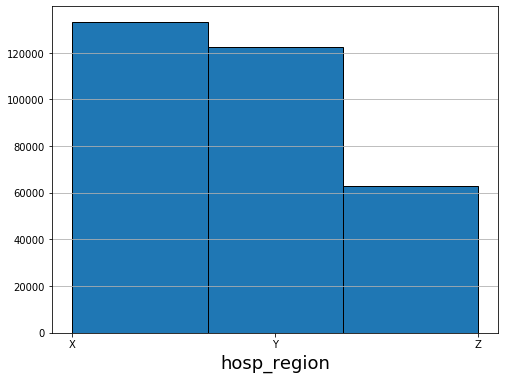

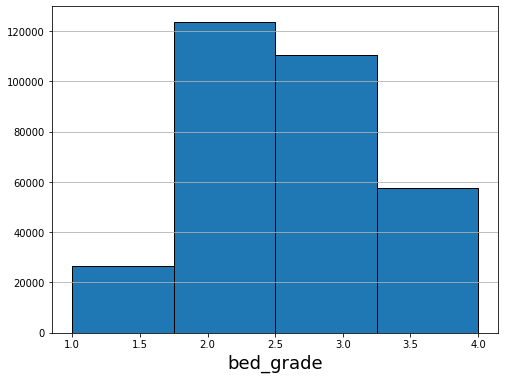

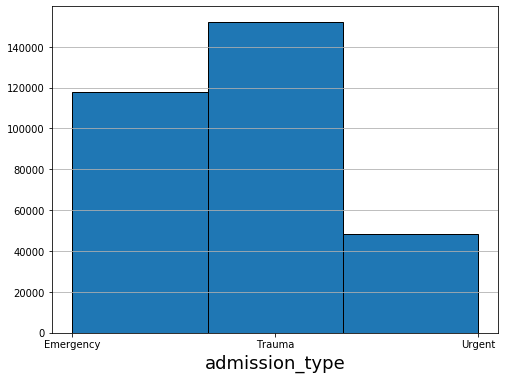

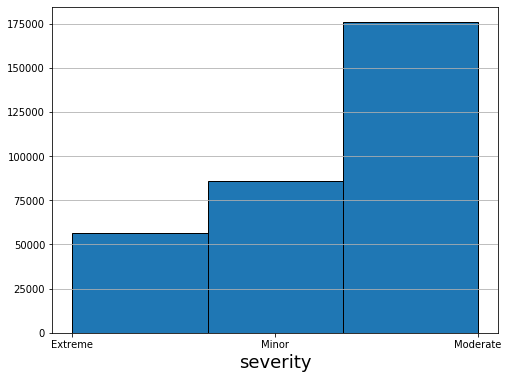

In [22]:
for i in other_columns:
    if health1[i].nunique() < 5:
        plt.figure(figsize=(8,6))
        plt.hist(health1[i].sort_values(), ec='k', bins=health1[i].nunique())
        plt.xlabel(i,fontsize=18)
        plt.grid(axis='y');

### Plot the distribution of columns with between 5 to 12 unique values

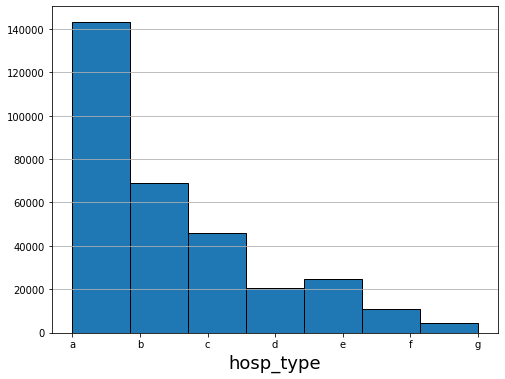

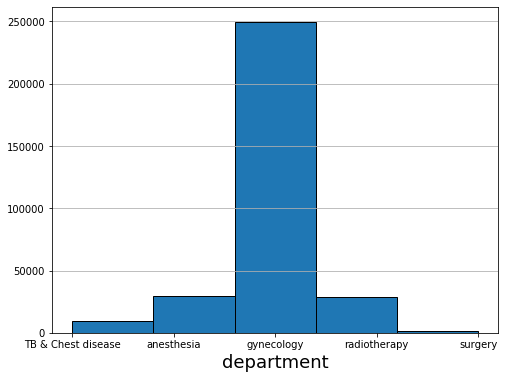

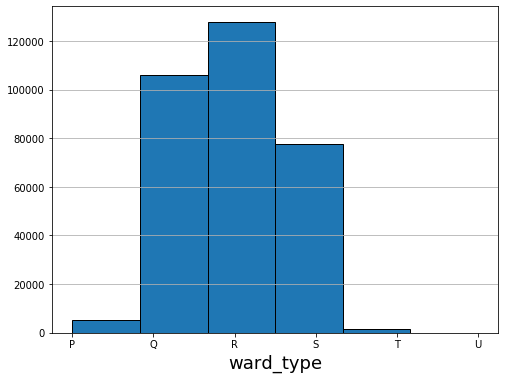

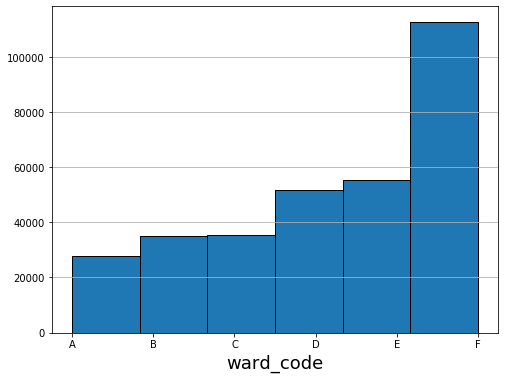

In [23]:
for i in other_columns:
    if ((health1[i].nunique() >= 5) & (health1[i].nunique() < 10)) :
        plt.figure(figsize=(8,6))
        plt.hist(health1[i].sort_values(), ec='k', bins=health1[i].nunique())
        plt.xlabel(i,fontsize=18)
        plt.grid(axis='y');

### Plot varaibles with between 10 and 12 categories 

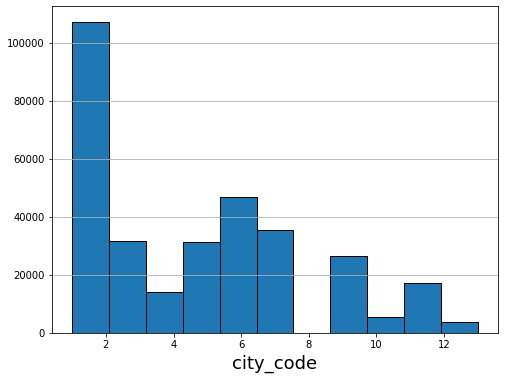

In [24]:
for i in other_columns:
    if ((health1[i].nunique() >= 10) & (health1[i].nunique() <= 12)):
        plt.figure(figsize=(8,6))
        plt.hist(health1[i].sort_values(), ec='k', bins=health1[i].nunique())
        plt.xlabel(i,fontsize=18)
        plt.grid(axis='y');

- **From the plots we can see that the distributions are definetely uneven and in all variables some categories have a lot more data.**

In [25]:
for i in ['severity','admission_type','city_code','bed_grade','hosp_region', 'ward_code', 'ward_type','hosp_type','department']:
    print(health1[i].value_counts(),'\n')

Moderate    175793
Minor        85850
Extreme      56682
Name: severity, dtype: int64 

Trauma       152200
Emergency    117624
Urgent        48501
Name: admission_type, dtype: int64 

1     55351
2     51809
6     46882
7     35462
3     31569
5     31105
9     26277
11    17137
4     13854
10     5249
13     3630
Name: city_code, dtype: int64 

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: bed_grade, dtype: int64 

X    133224
Y    122427
Z     62674
Name: hosp_region, dtype: int64 

F    112641
E     55351
D     51809
C     35462
B     35156
A     27906
Name: ward_code, dtype: int64 

R    127875
Q    106125
S     77793
P      5046
T      1477
U         9
Name: ward_type, dtype: int64 

a    143312
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: hosp_type, dtype: int64 

gynecology            249387
anesthesia             29647
radiotherapy           28506
TB & Chest disease      9584
surgery                 1201
Name: department, dtype:

- **We can certainly reduce the number of categories in hosp_type, ward_type, department and ward_code features, as they are unevenly distributed.**

### Ordinal vs Nominal Categories
- select Variables with less than 10 categories and devide them to ordinal and nominal category varaibles 

In [26]:
health1.head()

,case_id,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,patient_id,admission_type,severity,num_visitors,age,deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,Emergency,Extreme,2,5,4911,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,Trauma,Extreme,2,5,5954,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,Trauma,Extreme,2,5,4745,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,Trauma,Extreme,2,5,7272,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,Trauma,Extreme,2,5,5558,4


**Ordinal Categories**

In [27]:
ordinal_cat = ['bed_grade','severity','age']

**Nominal Categories**

In [28]:
nominal_cat = ['hosp_type', 'hosp_region', 'department', 'ward_type', 'ward_code', 'admission_type']

### Transform ordinal and nominal categories

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

***One hot encode nominal variables***

In [30]:
health1 = pd.concat([health1,pd.get_dummies(health1[nominal_cat],drop_first=True)], axis=1)

In [31]:
health1.head()

,case_id,hosp_code,hosp_type,city_code,hosp_region,rooms_available,department,ward_type,ward_code,bed_grade,...,ward_type_S,ward_type_T,ward_type_U,ward_code_B,ward_code_C,ward_code_D,ward_code_E,ward_code_F,admission_type_Trauma,admission_type_Urgent
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,1,0,0,0,0,0,0,1,1,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,1,0,0,0,0,0,1,0,1,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,0,0,0,0,0,1,0,0,1,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,1,0,0,0,0,1,0,0,1,0


In [32]:
health1.columns

Index(['case_id', 'hosp_code', 'hosp_type', 'city_code', 'hosp_region',
       'rooms_available', 'department', 'ward_type', 'ward_code', 'bed_grade',
       'patient_id', 'admission_type', 'severity', 'num_visitors', 'age',
       'deposit', 'stay', 'hosp_type_b', 'hosp_type_c', 'hosp_type_d',
       'hosp_type_e', 'hosp_type_f', 'hosp_type_g', 'hosp_region_Y',
       'hosp_region_Z', 'department_anesthesia', 'department_gynecology',
       'department_radiotherapy', 'department_surgery', 'ward_type_Q',
       'ward_type_R', 'ward_type_S', 'ward_type_T', 'ward_type_U',
       'ward_code_B', 'ward_code_C', 'ward_code_D', 'ward_code_E',
       'ward_code_F', 'admission_type_Trauma', 'admission_type_Urgent'],
      dtype='object')

In [33]:
## Drop the nominal columns
health1.drop(nominal_cat,inplace=True,axis=1)

In [34]:
health1.head()

,case_id,hosp_code,city_code,rooms_available,bed_grade,patient_id,severity,num_visitors,age,deposit,...,ward_type_S,ward_type_T,ward_type_U,ward_code_B,ward_code_C,ward_code_D,ward_code_E,ward_code_F,admission_type_Trauma,admission_type_Urgent
0,1,8,3,3,2.0,31397,Extreme,2,5,4911,...,0,0,0,0,0,0,0,1,0,0
1,2,2,5,2,2.0,31397,Extreme,2,5,5954,...,1,0,0,0,0,0,0,1,1,0
2,3,10,1,2,2.0,31397,Extreme,2,5,4745,...,1,0,0,0,0,0,1,0,1,0
3,4,26,2,2,2.0,31397,Extreme,2,5,7272,...,0,0,0,0,0,1,0,0,1,0
4,5,26,2,2,2.0,31397,Extreme,2,5,5558,...,1,0,0,0,0,1,0,0,1,0


In [35]:
health1.columns

Index(['case_id', 'hosp_code', 'city_code', 'rooms_available', 'bed_grade',
       'patient_id', 'severity', 'num_visitors', 'age', 'deposit', 'stay',
       'hosp_type_b', 'hosp_type_c', 'hosp_type_d', 'hosp_type_e',
       'hosp_type_f', 'hosp_type_g', 'hosp_region_Y', 'hosp_region_Z',
       'department_anesthesia', 'department_gynecology',
       'department_radiotherapy', 'department_surgery', 'ward_type_Q',
       'ward_type_R', 'ward_type_S', 'ward_type_T', 'ward_type_U',
       'ward_code_B', 'ward_code_C', 'ward_code_D', 'ward_code_E',
       'ward_code_F', 'admission_type_Trauma', 'admission_type_Urgent'],
      dtype='object')

***Transform Ordinal Categories***

In [36]:
ordinal_cat

['bed_grade', 'severity', 'age']

In [37]:
for i in ordinal_cat:
    print(i,health1[i].unique())

bed_grade [2. 3. 4. 1.]
severity ['Extreme' 'Moderate' 'Minor']
age [5 7 3 4 8 6 2 1 0 9]


***We only need to transformt he severity column since the other column categories are already in numeric values*** 

In [38]:
# Instantiate Ordinal Encoder and define categories
oe = OrdinalEncoder(categories=[['Minor','Moderate','Extreme']])

#Fit and transform the encoder
# Apply ordinal categorical columns to dataframe
health1['severity'] = oe.fit_transform(health1[['severity']])

In [39]:
health1.head()

,case_id,hosp_code,city_code,rooms_available,bed_grade,patient_id,severity,num_visitors,age,deposit,...,ward_type_S,ward_type_T,ward_type_U,ward_code_B,ward_code_C,ward_code_D,ward_code_E,ward_code_F,admission_type_Trauma,admission_type_Urgent
0,1,8,3,3,2.0,31397,2.0,2,5,4911,...,0,0,0,0,0,0,0,1,0,0
1,2,2,5,2,2.0,31397,2.0,2,5,5954,...,1,0,0,0,0,0,0,1,1,0
2,3,10,1,2,2.0,31397,2.0,2,5,4745,...,1,0,0,0,0,0,1,0,1,0
3,4,26,2,2,2.0,31397,2.0,2,5,7272,...,0,0,0,0,0,1,0,0,1,0
4,5,26,2,2,2.0,31397,2.0,2,5,5558,...,1,0,0,0,0,1,0,0,1,0


In [40]:
health1.columns

Index(['case_id', 'hosp_code', 'city_code', 'rooms_available', 'bed_grade',
       'patient_id', 'severity', 'num_visitors', 'age', 'deposit', 'stay',
       'hosp_type_b', 'hosp_type_c', 'hosp_type_d', 'hosp_type_e',
       'hosp_type_f', 'hosp_type_g', 'hosp_region_Y', 'hosp_region_Z',
       'department_anesthesia', 'department_gynecology',
       'department_radiotherapy', 'department_surgery', 'ward_type_Q',
       'ward_type_R', 'ward_type_S', 'ward_type_T', 'ward_type_U',
       'ward_code_B', 'ward_code_C', 'ward_code_D', 'ward_code_E',
       'ward_code_F', 'admission_type_Trauma', 'admission_type_Urgent'],
      dtype='object')

In [41]:
for i in ordinal_cat:
    print(i, health1[i].unique(),'\n')

bed_grade [2. 3. 4. 1.] 

severity [2. 1. 0.] 

age [5 7 3 4 8 6 2 1 0 9] 



***Save the transformed data into a new file***

In [42]:
#health1.to_csv('healthDataNew4.csv', index=False)

### Define X and y varaibles for modeling 

In [43]:
X = health1.drop(['stay','case_id'],axis=1)
y = health1.stay

In [44]:
X.head()

,hosp_code,city_code,rooms_available,bed_grade,patient_id,severity,num_visitors,age,deposit,hosp_type_b,...,ward_type_S,ward_type_T,ward_type_U,ward_code_B,ward_code_C,ward_code_D,ward_code_E,ward_code_F,admission_type_Trauma,admission_type_Urgent
0,8,3,3,2.0,31397,2.0,2,5,4911,0,...,0,0,0,0,0,0,0,1,0,0
1,2,5,2,2.0,31397,2.0,2,5,5954,0,...,1,0,0,0,0,0,0,1,1,0
2,10,1,2,2.0,31397,2.0,2,5,4745,0,...,1,0,0,0,0,0,1,0,1,0
3,26,2,2,2.0,31397,2.0,2,5,7272,1,...,0,0,0,0,0,1,0,0,1,0
4,26,2,2,2.0,31397,2.0,2,5,5558,1,...,1,0,0,0,0,1,0,0,1,0


### Split train and test sets 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

## Modeling

### 1. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

#### Create a random forest model using all variables and wihout feature scaling 

In [47]:
# Instantiate the model 
rfAll = RandomForestClassifier(n_estimators=30, max_features= 10,
                               max_depth=50, min_samples_split=10, random_state= 50)

# Fit the model 
rfAll.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [48]:
# Make predictions
y_pred_rfAll = rfAll.predict(X_train)

In [49]:
from sklearn.metrics import accuracy_score

## Check the Accuracy score 
rfAll_accuracy = round(accuracy_score(y_train, y_pred_rfAll),5)
rfAll_accuracy

0.77303

- This is not a bad score. 

#### Check the testing accuracy too

In [50]:
# Make predictions
y_pred_rfAll_test = rfAll.predict(X_test)

## Check the Accuracy score 
rfAll_accuracy_test = round(accuracy_score(y_test, y_pred_rfAll_test),5)
rfAll_accuracy_test

0.40036

***Check for feature importance.***

In [51]:
pd.Series(data=rfAll.feature_importances_,
index= X_train.columns).sort_values(ascending=False)

deposit                    0.203445
patient_id                 0.187682
num_visitors               0.151520
age                        0.088378
rooms_available            0.061082
hosp_code                  0.047216
bed_grade                  0.042641
severity                   0.031771
city_code                  0.021531
ward_type_Q                0.018078
department_gynecology      0.016548
ward_type_S                0.013838
admission_type_Trauma      0.013443
department_radiotherapy    0.012122
ward_type_R                0.011862
admission_type_Urgent      0.011065
department_anesthesia      0.009615
ward_code_C                0.006895
ward_code_F                0.006701
hosp_region_Z              0.005596
hosp_type_c                0.005528
hosp_type_e                0.004892
hosp_type_d                0.004692
hosp_region_Y              0.004260
ward_code_E                0.004074
hosp_type_b                0.003725
ward_code_D                0.003606
ward_code_B                0

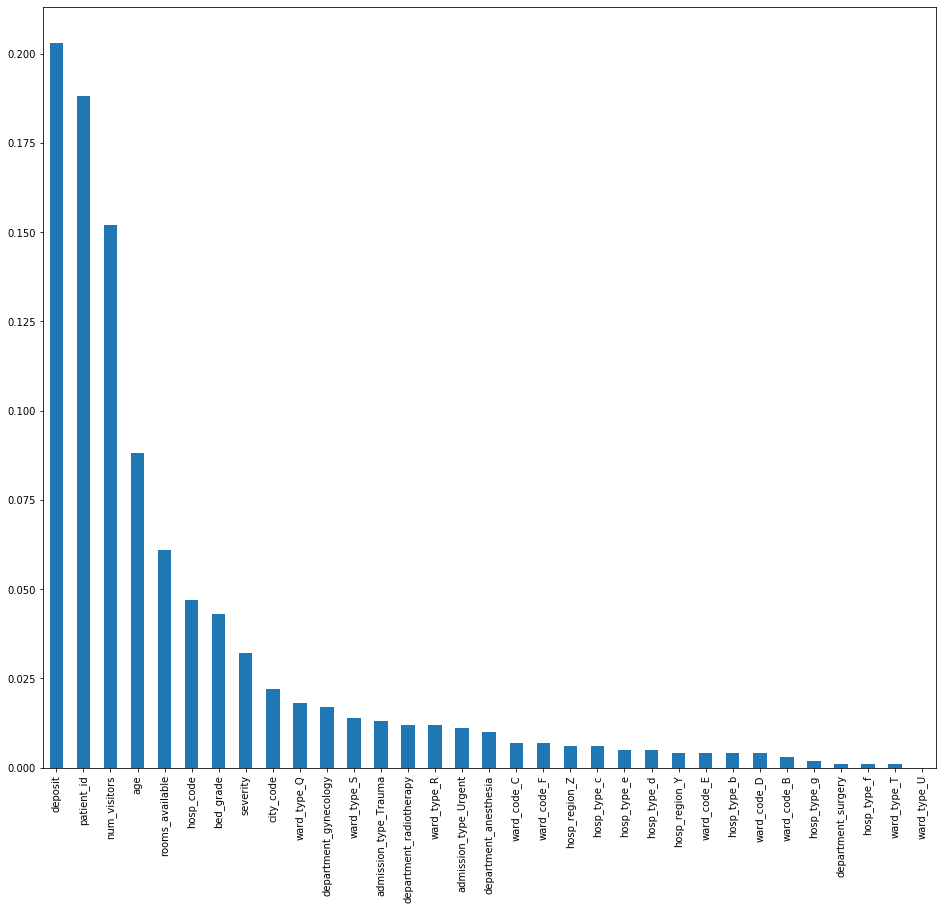

In [52]:
## Plot feature importance. 
plt.figure(figsize=(16,14))

pd.Series(data=rfAll.feature_importances_,
          index=X_train.columns).sort_values(ascending=False).round(3).plot(kind='bar');

In [53]:
top10Features = ['deposit', 'patient_id', 'num_visitors', 'age', 'rooms_available', 'hosp_code', 'bed_grade', 
                 'severity', 'city_code', 'ward_type_Q']

#### Re-create the random forest model using the top 10 features. 

In [54]:
rf_top10 = RandomForestClassifier(n_estimators=30, max_features=8, max_depth=50, min_samples_split=10,
                                 random_state=30)

rf_top10.fit(X_train[top10Features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [55]:
# Make predictions with training data
y_pred_rfTop10 = rf_top10.predict(X_train[top10Features])

## Check the Accuracy score 
rftop10_accuracy_train = round(accuracy_score(y_train, y_pred_rfTop10),5)
rftop10_accuracy_train

0.81129

In [56]:
# Make predictions with testing data 
y_pred_rfTop10_test = rf_top10.predict(X_test[top10Features])

## Check the Accuracy score 
rftop10_accuracy_test = round(accuracy_score(y_test, y_pred_rfTop10_test),5)
rftop10_accuracy_test

0.38022

- ***Creating a Randome Forrest model uisng the top 10 features increases the accuracy from 77% to 81%.***
- ***However, the testing accuracy decreases from 40% to 38%.***

In [57]:
top5Features = ['deposit', 'patient_id', 'num_visitors', 'age', 'rooms_available']

rf_top5 = RandomForestClassifier(n_estimators=30, max_features=3, max_depth=50, min_samples_split=10,
                                 random_state=30)

rf_top5.fit(X_train[top5Features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [58]:
# Make predictions with training data
y_pred_rfTop5 = rf_top5.predict(X_train[top5Features])

## Check the Accuracy score 
rftop5_accuracy_train = round(accuracy_score(y_train, y_pred_rfTop5),5)
rftop5_accuracy_train

0.74345

In [59]:
# Make predictions with testing data 
y_pred_rfTop5_test = rf_top5.predict(X_test[top5Features])

## Check the Accuracy score 
rftop5_accuracy_test = round(accuracy_score(y_test, y_pred_rfTop5_test),5)
rftop5_accuracy_test

0.323

***When we create a Random Forest model with the top 5 features both training and testing accuracy decreses.***

### 2. Neural Network Model

- For the Neural Network model we will be using all the data and the top 10 features determined by Random Forest Classifier. 

In [60]:
### Import all libraries required
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.utils import to_categorical
import  tensorflow.keras as keras

Using TensorFlow backend.


In [61]:
### Make copies of the X and y variables 

X2 = X.copy()
y2 = y.copy()

In [62]:
X2.head()

,hosp_code,city_code,rooms_available,bed_grade,patient_id,severity,num_visitors,age,deposit,hosp_type_b,...,ward_type_S,ward_type_T,ward_type_U,ward_code_B,ward_code_C,ward_code_D,ward_code_E,ward_code_F,admission_type_Trauma,admission_type_Urgent
0,8,3,3,2.0,31397,2.0,2,5,4911,0,...,0,0,0,0,0,0,0,1,0,0
1,2,5,2,2.0,31397,2.0,2,5,5954,0,...,1,0,0,0,0,0,0,1,1,0
2,10,1,2,2.0,31397,2.0,2,5,4745,0,...,1,0,0,0,0,0,1,0,1,0
3,26,2,2,2.0,31397,2.0,2,5,7272,1,...,0,0,0,0,0,1,0,0,1,0
4,26,2,2,2.0,31397,2.0,2,5,5558,1,...,1,0,0,0,0,1,0,0,1,0


In [63]:
#### Standardize (scale) all the data using a Robust Scaler 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X2.loc[:,:] = scaler.fit_transform(X2)

In [64]:
X2.head()

,hosp_code,city_code,rooms_available,bed_grade,patient_id,severity,num_visitors,age,deposit,hosp_type_b,...,ward_type_S,ward_type_T,ward_type_U,ward_code_B,ward_code_C,ward_code_D,ward_code_E,ward_code_F,admission_type_Trauma,admission_type_Urgent
0,-0.733333,-0.4,0.0,-1.0,-0.523109,1.0,-0.5,0.5,0.139002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.133333,0.0,-0.5,-1.0,-0.523109,1.0,-0.5,0.5,0.991823,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.600000,-0.8,-0.5,-1.0,-0.523109,1.0,-0.5,0.5,0.003271,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.466667,-0.6,-0.5,-1.0,-0.523109,1.0,-0.5,0.5,2.069501,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.466667,-0.6,-0.5,-1.0,-0.523109,1.0,-0.5,0.5,0.668029,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [65]:
## Transform the target (y) variable to categorical (Adding number of classes)
y2 = to_categorical(y2)

print('y2 shape: ', y2.shape)

y2 shape:  (318325, 11)


In [66]:
### Split the data into train and test sets 
X_train2, X_test2, y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.2,random_state = 50)

In [67]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(254660, 33)
(254660, 11)
(63665, 33)
(63665, 11)


In [68]:
## Create the Neural Netwrok 
## Create a new neural network 
# Define input shape
input_shape = X_train2.shape[1]

# Instantiate the Sequential model 
nn1 = Sequential()

# Add Layers 
nn1.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ,input_shape=(input_shape,)))
nn1.add(Dense(32, activation='relu'))
nn1.add(Dense(16, activation='relu'))
nn1.add(Dense(8, activation='relu'))

# Add output layer 
nn1.add(Dense(11, activation='relu'))

In [69]:
# Define a custom optimizer 
opt = keras.optimizers.Adam(lr=0.0001)
nn1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
nn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2176      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                99        
Total params: 5,019
Trainable params: 5,019
Non-trainable params: 0
_________________________________________________________________


In [70]:
## Fit the model 
batch_size = 15
n_epochs = 20

hist = nn1.fit(X_train2, y_train2, epochs=n_epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
13582/13582 [==============================] - 28s 2ms/step - loss: 2.4121 - accuracy: 0.2475 - val_loss: 1.8446 - val_accuracy: 0.2794
Epoch 2/20
13582/13582 [==============================] - 28s 2ms/step - loss: 1.7807 - accuracy: 0.3231 - val_loss: 1.7462 - val_accuracy: 0.3366
Epoch 3/20
13582/13582 [==============================] - 27s 2ms/step - loss: 1.7330 - accuracy: 0.3437 - val_loss: 1.7157 - val_accuracy: 0.3437
Epoch 4/20
13582/13582 [==============================] - 35s 3ms/step - loss: 1.7155 - accuracy: 0.3481 - val_loss: 1.7045 - val_accuracy: 0.3500
Epoch 5/20
13582/13582 [==============================] - 26s 2ms/step - loss: 1.6959 - accuracy: 0.3542 - val_loss: 1.6885 - val_accuracy: 0.3522
Epoch 6/20
13582/13582 [==============================] - 27s 2ms/step - loss: 1.6827 - accuracy: 0.3576 - val_loss: 1.6797 - val_accuracy: 0.3550
Epoch 7/20
13582/13582 [==============================] - 31s 2ms/step - loss: 1.6734 - accuracy: 0.3585 - val_loss: 1

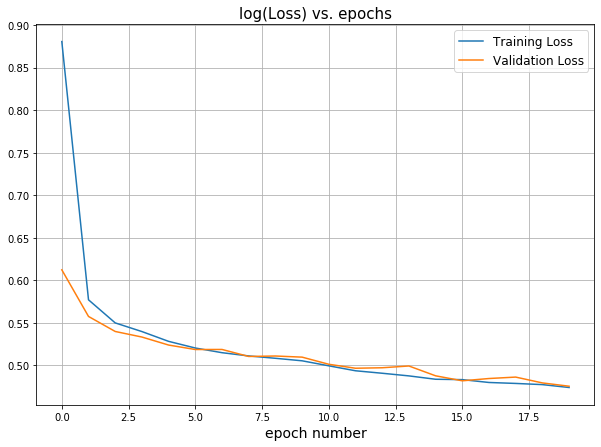

In [71]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.log(hist.history['loss']), label='Training Loss')
ax.plot(np.log(hist.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

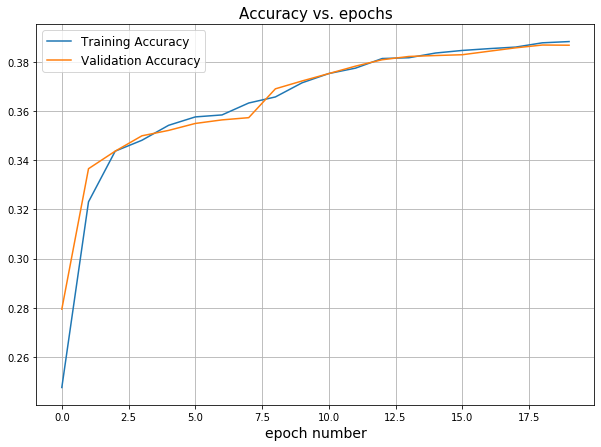

In [72]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(hist.history['accuracy'], label='Training Accuracy')
ax.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax.set_title("Accuracy vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

In [76]:
### Create a new nueral network with different parameters

# Define input shape
input_shape = X_train2.shape[1]

# Instantiate the Sequential model 
nn2 = Sequential()

# Add Layers 
nn2.add(Dense(64, activation='relu',kernel_initializer='he_uniform',input_shape=(input_shape,)))
nn2.add(Dense(32, activation='relu'))
nn2.add(Dense(16, activation='relu'))
nn2.add(Dense(8, activation='relu'))

# Add output layer 
nn2.add(Dense(11, activation='relu'))

In [77]:
# Define a custom optimizer 
opt = keras.optimizers.Adam(lr=0.001)
nn2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                2176      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 11)                99        
Total params: 5,019
Trainable params: 5,019
Non-trainable params: 0
_________________________________________________________________


In [78]:
## Fit the model 
batch_size = 20
n_epochs = 25

hist2 = nn2.fit(X_train2, y_train2, epochs=n_epochs, batch_size=batch_size, validation_split=0.25)

Epoch 1/25
9550/9550 [==============================] - 19s 2ms/step - loss: 2.2383 - accuracy: 0.3426 - val_loss: 2.1341 - val_accuracy: 0.3581
Epoch 2/25
9550/9550 [==============================] - 62s 6ms/step - loss: 2.1219 - accuracy: 0.3694 - val_loss: 2.1100 - val_accuracy: 0.3813
Epoch 3/25
9550/9550 [==============================] - 26s 3ms/step - loss: 2.0924 - accuracy: 0.3837 - val_loss: 2.1000 - val_accuracy: 0.3824
Epoch 4/25
9550/9550 [==============================] - 29s 3ms/step - loss: 2.0696 - accuracy: 0.3885 - val_loss: 2.0739 - val_accuracy: 0.3862
Epoch 5/25
9550/9550 [==============================] - 25s 3ms/step - loss: 2.0512 - accuracy: 0.3933 - val_loss: 2.0513 - val_accuracy: 0.3996
Epoch 6/25
9550/9550 [==============================] - 32s 3ms/step - loss: 2.0386 - accuracy: 0.4016 - val_loss: 2.0461 - val_accuracy: 0.3992
Epoch 7/25
9550/9550 [==============================] - 24s 2ms/step - loss: 2.0281 - accuracy: 0.4030 - val_loss: 2.0358 - val_ac

In [79]:
np.log(hist2.history['val_loss']).mean()

0.7075180504723952

In [80]:
np.log(hist2.history['loss']).mean()

0.7047702209433798

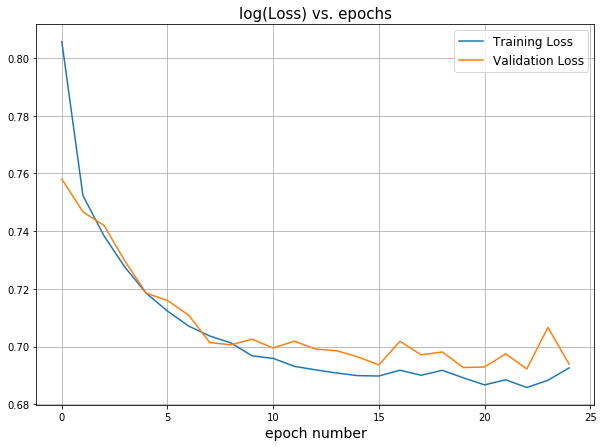

In [81]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.log(hist2.history['loss']), label='Training Loss')
ax.plot(np.log(hist2.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

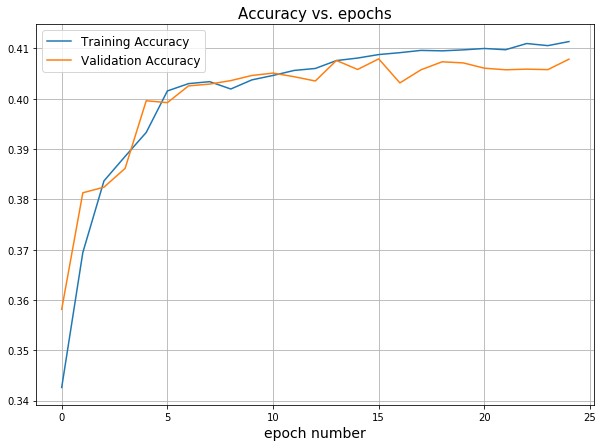

In [82]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(hist2.history['accuracy'], label='Training Accuracy')
ax.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
ax.set_title("Accuracy vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

#### Create a model using the top 10 features identified by Random FOrest Classifier 

In [ ]:
### Create new instances of X and y varaibles 
X3 = X.copy()
y3 = y.copy()

In [ ]:
## Add categories to y shape
y3 = to_categorical(y3)
y3.shape

In [ ]:
### Split train and test sets 
### Split the data into train and test sets 
X_train3, X_test3, y_train3,y_test3 = train_test_split(X3,y3,test_size = 0.3,random_state = 38)

In [ ]:
# Define input shape
input_shape = X_train3[top10Features].shape[1]

# Instantiate the Sequential model 
nn3 = Sequential()

# Add Layers 
nn3.add(Dense(64, activation='relu', input_shape=(input_shape,)))
nn3.add(Dense(32, activation='relu'))
nn3.add(Dense(16, activation='relu'))
nn3.add(Dense(8, activation='relu'))

# Add output layer 
nn3.add(Dense(11, activation='relu'))

In [ ]:
# Define a custom optimizer 
opt = keras.optimizers.Adam(lr=0.0001)
nn3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
nn3.summary()

In [ ]:
## Fit the model 
batch_size = 20
n_epochs = 20

hist3 = nn3.fit(X_train3[top10Features], y_train3, epochs=n_epochs, batch_size=batch_size, validation_split=0.25)

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.log(hist3.history['loss']), label='Training Loss')
ax.plot(np.log(hist3.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(hist3.history['accuracy'], label='Training Accuracy')
ax.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
ax.set_title("Accuracy vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

In [108]:
#metrics_data = {
    #"Training Accuracy(%)":[((rfAll_accuracy) * 100).round(),((rftop10_accuracy_train) * 100).round(),
                                 #round((hist2.history['accuracy'][1]) * 100)],
    #"Testing Accuracy(%)":[((rfAll_accuracy_test) * 100).round(),((rftop10_accuracy_test) * 100).round(),
                                 #round((hist2.history['val_accuracy'][1]) * 100)],
    ##'Training Loss(%)':['NA','NA', float(42.0)],
    #"Validation Loss(%)":['NA','NA', float(43.0)]
#}


#Model_comparison = pd.DataFrame(metrics_data,index=['Random Forest All Varaibles','Random Forest Top10', 'ANN'])

In [123]:
#Model_comparison

In [146]:
metrics_data = {
    "Training Accuracy (%)":[77,81,41],
    "Testing Accuracy (%)":[40,39,40],
    'Training Loss (%)':['NA','NA', 42],
    "Validation Loss (%)":['NA','NA',43]
}


model_comparison = pd.DataFrame(metrics_data,index=['Random Forest All Variables','Random Forest Top10', 'ANN'])

In [147]:
model_comparison

,Training Accuracy (%),Testing Accuracy (%),Training Loss (%),Validation Loss (%)
Random Forest All Variables,77,40,NA,NA
Random Forest Top10,81,39,NA,NA
ANN,41,40,42,43
